## Кластеризация ТС

Выполняю код Саши по задачам 3-6

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

%run "problems3_6.ipynb"

Доля записей, в которых бак пустой: 0.593607579755337
Доля записей, в которых зажигание выключено: 0.5748380906692252
Доля записей, в которых выполнено и то и то: 0.5747781242504197
Средний уровень топлива у ТС #1 при выключенном зажигании: 0.00
Средний уровень топлива у ТС #3 при выключенном зажигании: 71.30
Средний уровень топлива у ТС #5 при выключенном зажигании: 0.05
Средний уровень топлива у ТС #19 при выключенном зажигании: 0.00
Средний уровень топлива у ТС #28 при выключенном зажигании: 0.00


In [81]:
X

,MaxFuelLevel,MeanFuelLevel,MedianFuelLevel,MaxSpeed,MeanSpeed,MedianSpeed,MeanAbsAcceleration,MedianAbsAcceleration,MeanTachometer,MedianTachometer,MeanIngection,MedianDecLPH
1,59.69,38.865458,3.948000e+01,124.2,38.343104,30.0,160.861672,108.0,1807.216478,1568.0,0.984815,-12.449061
3,277.21,180.773407,1.873600e+02,93.4,19.148629,14.8,102.152539,24.0,1032.753226,950.0,0.999032,-10.028369
5,73.07,40.352908,4.063000e+01,124.6,48.209261,45.9,170.587938,120.0,1572.068366,1686.0,0.976389,-16.786343
19,95.00,29.941259,2.536000e+01,13.8,1.420739,1.2,8.038214,6.0,1126.779966,1110.0,0.991352,-8.823927
28,60.00,16.825789,1.890044e-13,115.1,36.022691,29.1,79.277601,0.0,817.308707,0.0,0.425162,-65.023800


In [82]:
X_upd = X.drop(['MeanTachometer', 'MedianTachometer', 'MeanIngection'], axis='columns')
X_upd

,MaxFuelLevel,MeanFuelLevel,MedianFuelLevel,MaxSpeed,MeanSpeed,MedianSpeed,MeanAbsAcceleration,MedianAbsAcceleration,MedianDecLPH
1,59.69,38.865458,3.948000e+01,124.2,38.343104,30.0,160.861672,108.0,-12.449061
3,277.21,180.773407,1.873600e+02,93.4,19.148629,14.8,102.152539,24.0,-10.028369
5,73.07,40.352908,4.063000e+01,124.6,48.209261,45.9,170.587938,120.0,-16.786343
19,95.00,29.941259,2.536000e+01,13.8,1.420739,1.2,8.038214,6.0,-8.823927
28,60.00,16.825789,1.890044e-13,115.1,36.022691,29.1,79.277601,0.0,-65.023800


In [83]:
scaler = StandardScaler()
X_valid = scaler.fit_transform(X_upd.to_numpy())
#X_valid = X_upd.to_numpy()

сначала попробуем визуализировать наши данные инструментом t-SNE.
это инструмент для визуализации многомерных данных. Он преобразует сходства
между точками данных в совместные вероятности и пытается минимизировать расхождение
Кульбака-Лейблера между совместными вероятностями низкоразмерного встраивания и
многомерных данных. t-SNE имеет функцию стоимости, которая не является выпуклой,
то есть при разных инициализациях мы можем получить разные результаты.

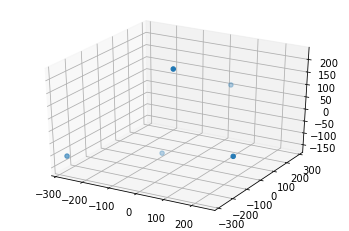

In [84]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3, perplexity=30, learning_rate=100).fit_transform(X_valid)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_embedded[:,0], X_embedded[:,1], X_embedded[:,2])

Произведем кластеризации различными методами и построим дендрограммы

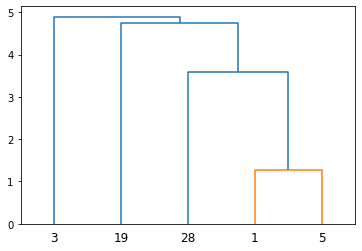

In [85]:
from scipy.cluster.hierarchy import linkage, dendrogram
indexes = list(X.index)
# считаем за расстояние ближайшие точки двух кластеров
Z = linkage(X_valid, 'single', 'euclidean', True)
dn = dendrogram(Z, labels=indexes)
plt.show()

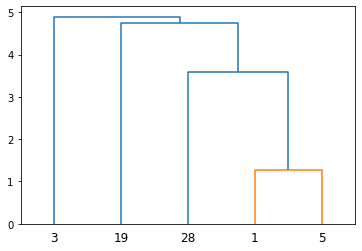

In [86]:
Z = linkage(X_valid, 'single', 'euclidean', False)
dn = dendrogram(Z, labels=indexes)
plt.show()

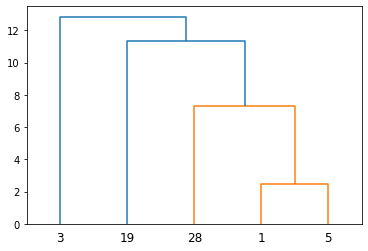

In [87]:
Z = linkage(X_valid, 'single', 'cityblock', True)
dn = dendrogram(Z, labels=indexes)
plt.show()

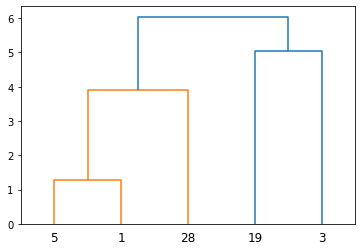

In [88]:
# считаем за расстояние самые отдаленные точки кластеров
Z = linkage(X_valid, 'complete', 'euclidean', True)
dn = dendrogram(Z, labels=indexes)
plt.show()

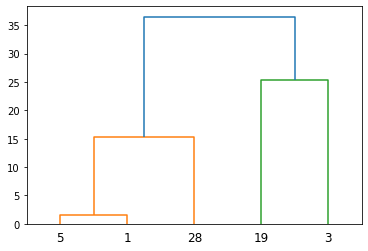

In [89]:
Z = linkage(X_valid, 'complete', 'sqeuclidean', True)
dn = dendrogram(Z, labels=indexes)
plt.show()
# как и предполагалось, при изменении метрики таким образом просто увеличивается расстояние между отдаленными объектами

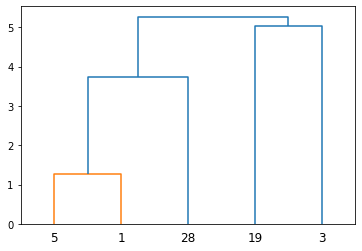

In [90]:
Z = linkage(X_valid, 'weighted', 'euclidean', True)
dn = dendrogram(Z, labels=indexes)
plt.show()

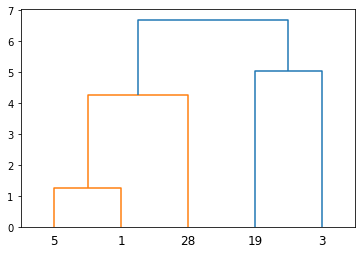

In [91]:
Z = linkage(X_valid, 'ward', 'euclidean', True)
dn = dendrogram(Z, labels=indexes)
plt.show()

Итого большинство методов дает один и тот же результат по разделению ТС. Подробнее про алгоритмы метода linkage написано тут https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage

в планах прочитать про  DBSCAN, но мне кажется, что можно оставить и linkage. Правильнее, наверное, будет выделить 3 кластера, но как это описать не с точки зрения "я так вижу" мне придумать тяжело. Кстати и при визуализации мы получили тоже такую-же картину. Мне сложно понять, насколько они различны/индентичны с математической стороны

это разбиение ТС по типам, т.е. задание 6.